In [66]:
import pandas as pd
import numpy as np
import warnings, os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from scipy.sparse import csr_matrix

warnings.filterwarnings('ignore')


In [ ]:
os.chdir('..')

In [75]:
df = pd.read_csv('data/raw_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

5 categorical variables and 3 number categorical

In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
df.duplicated().sum()

0

No duplicate and null data

We are going to create average score and total score to improve the features

In [76]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


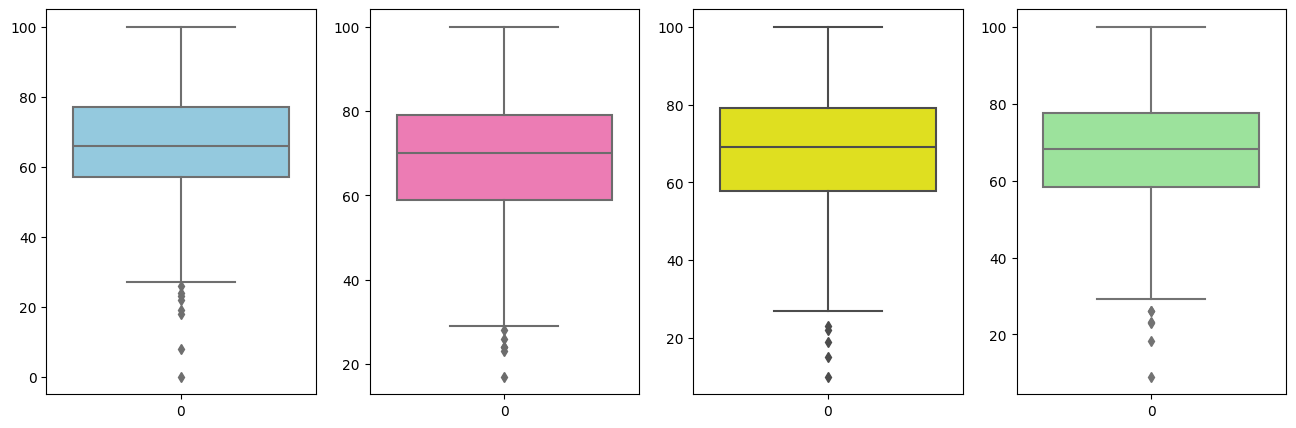

In [51]:
# Check outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

In [77]:
# Prepare de predicted class
df['test_passed'] = [1 if x > 210 else 0 for x in df['total_score']] # Passed with a average of > 70 in the 3 test
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,test_passed
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,1


In [56]:
df[['test_passed', 'average_score']].groupby(['test_passed']).mean()

,average_score
test_passed,
0,57.637131
1,80.307233


In [45]:
df['test_passed'].value_counts(normalize=True)

preparation_course_finished
0    0.553
1    0.447
Name: proportion, dtype: float64

Create a pipeline to transform other data for modeling

In [78]:
X = df.drop(['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score', 'test_passed'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [79]:
for i in X.columns:
    print(i, X[i].unique())

gender ['female' 'male']
race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test_preparation_course ['none' 'completed']


In [88]:
df_encoded = pd.get_dummies(X, columns=X.columns, dtype=int)
df_encoded.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [93]:
df_encoded['test_passed'] = df['test_passed']
df_encoded.to_csv('data/prepared_data.csv', index=False)  